# Titanic: Machine Learning from Disaster

___

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
plt.style.use('ggplot')
plt.rc('figure', dpi=90)

In [3]:
data = pd.read_csv('train.csv', index_col=0)

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

| Variable | Definition                                 | Key                                            |
|----------|:------------------------------------------:|:----------------------------------------------:|
|survival  | Survival                                   | 0 = No, 1 = Yes                                |
|pclass	   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
|sex       | Sex                                        |                                                |
|Age       | Age in years                               |                                                |
|sibsp     | # of siblings / spouses aboard the Titanic |                                                |
|parch     | # of parents / children aboard the Titanic |                                                |
|ticket    | Ticket number                              |                                                |
|fare      | Passenger fare                             |                                                |
|cabin     | Cabin number                               |                                                |
|embarked  | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


___
## Embarked vs Survived:
### Is the port that the passenger embarked a significant factor in survival?

### Observed

In [6]:
embarked_survival = pd.crosstab(data.Embarked, 
                                data.Survived, 
                                margins=True)
embarked_survival

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


### Proportions

In [7]:
embarked_survival_proportions = pd.crosstab(data.Embarked,
                                            data.Survived,
                                            normalize='index')
embarked_survival_proportions

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


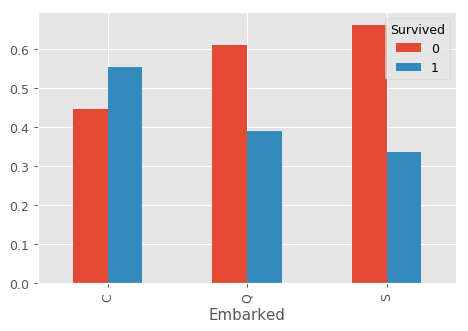

In [8]:
embarked_survival_proportions.plot.bar()

It appears that the passengers that embarked on port C have a higher proportion of survivals. Is this differences of proportions significant?

In [9]:
st.chi2_contingency(embarked_survival.iloc[:-1, :-1])

(26.48914983923762,
 1.769922284120912e-06,
 2,
 array([[103.7480315,  64.2519685],
        [ 47.5511811,  29.4488189],
        [397.7007874, 246.2992126]]))

Ho: port of embarkation and survival is independent  
Ha: port of embarkation and survival is not independent

p-value is low, it gives strong evidence to reject Ho, and conclude that port of embarkation and survival is not independent.

___
## Class vs Survived:
### Is the passenger class a significant factor in survival?

### Observed

In [10]:
class_survival = pd.crosstab(data.Pclass, 
                             data.Survived, 
                             margins=True)
class_survival

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### Proportions

At first sight the proportion of survival is much higher for higher classes

In [11]:
class_survival_proportions = pd.crosstab(data.Pclass,
                                         data.Survived,
                                         normalize='index')
class_survival_proportions

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


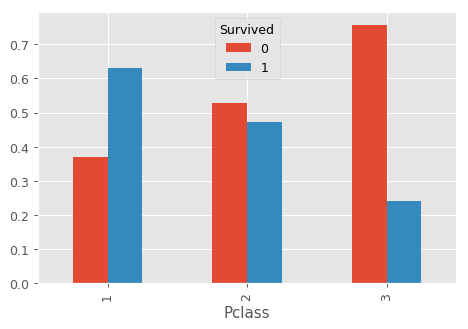

In [12]:
class_survival_proportions.plot.bar()

The trend here is that the lower the class the lower the proportion of survivals, is this significant?

### Chi-square test for independency

In [13]:
st.contingency.chi2_contingency(class_survival.iloc[:-1, :-1])

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

Ho: passenger class and survival are independent  
Ha: passsenger class and survival are **not** independent

As the p-value shows (4.549251711298793e-23), is very unlikely to observe this kind of differences in proportion if both variables were independent. We can reject Ho, and conclude that they  are dependent.

___
## Sex vs Survival:
### Does survival have a gender effect?

### Observations

In [14]:
gender_survival = pd.crosstab(data.Sex,
                              data.Survived,
                              margins=True)
gender_survival

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


### Proportions

In [15]:
gender_survival_proportions = pd.crosstab(data.Sex,
                                          data.Survived,
                                          normalize='index')
gender_survival_proportions

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


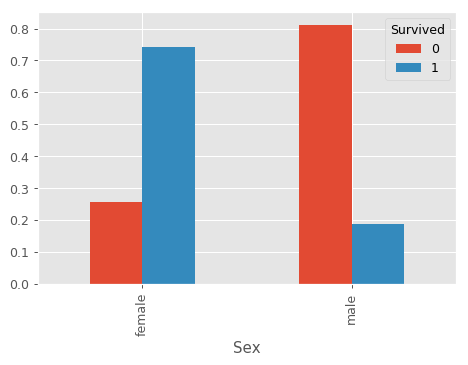

In [16]:
gender_survival_proportions.plot.bar()

The proportion of females that survived is higher, is this difference significant?

### Chi-square test for independence

In [17]:
st.contingency.chi2_contingency(gender_survival.iloc[:-1, :-1])  # exclude margins

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

Ho: sex and survival are independent  
Ha: ser and survival are **not** independent

P value is verly low, this gives us a strong evidence against the null hyphotesis, we can conclude that both variables are not independent. In other words survival is affected by passenger Gender.

___
## Fare vs Survived
### Is survival influenced by the fare the passenger paid?

### Logistic regression

In [18]:
from statsmodels.discrete.discrete_model import Logit

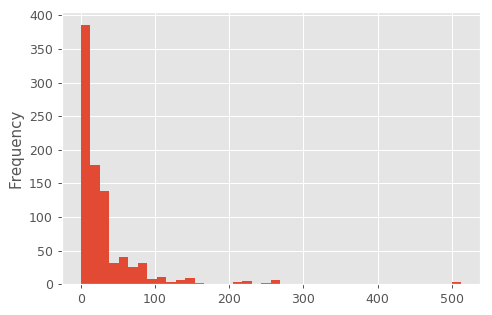

In [19]:
data.Fare.plot.hist(bins=40)

In [20]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

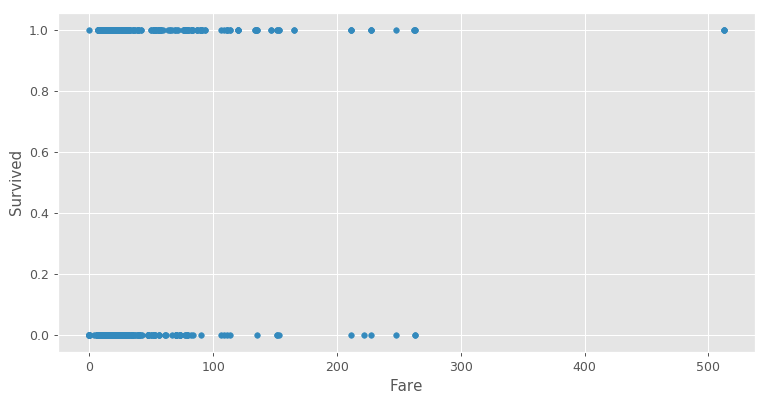

In [21]:
data.loc[:, ['Survived', 'Fare']].plot.scatter('Fare', 'Survived', figsize=(10, 5))

There appears to be a lot of overlap

In [22]:
logit = Logit(data.Survived, data.Fare)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.689550
         Iterations 4


In [23]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   4.0000   
Dependent Variable: Survived         Pseudo R-squared: -0.035   
Date:               2018-05-07 00:37 AIC:              1230.7774
No. Observations:   891              BIC:              1235.5697
Df Model:           0                Log-Likelihood:   -614.39  
Df Residuals:       890              LL-Null:          -593.33  
Converged:          1.0000           Scale:            1.0000   
-------------------------------------------------------------------
         Coef.     Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Fare     0.0030      0.0012    2.4342    0.0149    0.0006    0.0054
================================================================

"""

Ho: the surviving outcome probability is not associated with fare  
Ha: the surviving outcome **is** accociated with fare

The p-value is significantly low 1.5%, considering 5% significance test we can reject Ho and conclude that the fare payed is associated with the surviving outcome probability.

### Is there a difference between mean of fare payed by passengers that survived and passengers that did not?

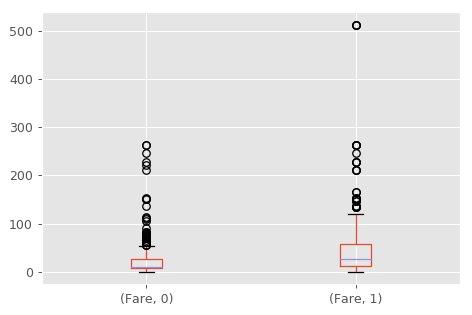

In [24]:
survived_fare = data.loc[:, ['Survived', 'Fare']].pivot(columns='Survived')
survived_fare.plot.box()

In [25]:
survived_fare.describe()

Fare            
Survived           0           1
count     549.000000  342.000000
mean       22.117887   48.395408
std        31.388207   66.596998
min         0.000000    0.000000
25%         7.854200   12.475000
50%        10.500000   26.000000
75%        26.000000   57.000000
max       263.000000  512.329200

At first sight survivors seeemed to have had payed more.

In [26]:
died = survived_fare.Fare.loc[:, 0].dropna()
lived = survived_fare.Fare.loc[:, 1].dropna()
st.f_oneway(died, lived)

F_onewayResult(statistic=63.03076422804448, pvalue=6.120189341921873e-15)

Ho: u1 - u2 = 0  
Ha: u1 - u2 != 0

Where u1 is the fare payed by survivors and u2 the fare payed by not survivors.

The p-value is extremely low, this means that the differences observed in the means is not caused by sampling variability. We have strong evidence against Ho, therefore we reject Ho and conclude that there's a significant difference between both means.

#### Confidence intervals

In [27]:
st.norm.interval(.95, died.mean(), died.std())

(-39.4018674539644, 83.6376412244562)

In [28]:
st.norm.interval(.95, lived.mean(), died.std())

(-13.124346736871118, 109.91516194154948)

___
## SibSp vs Survived: 
### Having sibilings or spouse is associated in some way to survival outcome?

In [29]:
sibsp_survived = data.loc[:, ['Survived', 'SibSp']]

In [30]:
pd.crosstab(sibsp_survived.SibSp,
            sibsp_survived.Survived, 
            margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [31]:
st.contingency.chi2_contingency(_.iloc[:-1, :-1])

(37.2717929152043,
 1.5585810465902147e-06,
 6,
 array([[374.62626263, 233.37373737],
        [128.77777778,  80.22222222],
        [ 17.25252525,  10.74747475],
        [  9.85858586,   6.14141414],
        [ 11.09090909,   6.90909091],
        [  3.08080808,   1.91919192],
        [  4.31313131,   2.68686869]]))

Ho: SibSp is not related with Survived  
H1: SibSp is related with survived

Chi-square results in a small pvalue, when treating the number of sibilings or spouse as categorical, there's a significant difference between the different counts and the survival proportion.

In [32]:
pd.crosstab(sibsp_survived.SibSp, 
            sibsp_survived.Survived, 
            normalize='index')

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


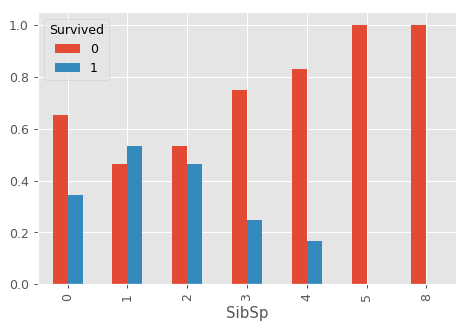

In [33]:
_.plot.bar()

### Treating SibSp as numerical

In [34]:
sibsp_survived_p = sibsp_survived.pivot(columns='Survived')

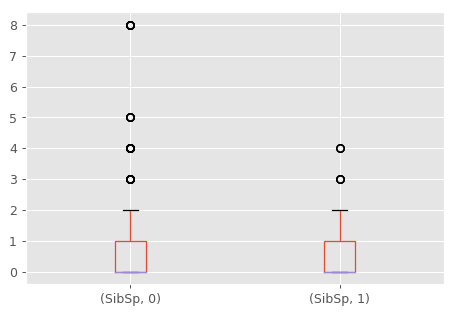

In [35]:
sibsp_survived_p.plot.box()

In [36]:
sibsp_survived_p.describe()

SibSp            
Survived           0           1
count     549.000000  342.000000
mean        0.553734    0.473684
std         1.288399    0.708688
min         0.000000    0.000000
25%         0.000000    0.000000
50%         0.000000    0.000000
75%         1.000000    1.000000
max         8.000000    4.000000

In [37]:
st.ttest_ind(sibsp_survived_p.SibSp.loc[:, 0],
             sibsp_survived_p.SibSp.loc[:, 1],
             nan_policy='omit')

Ttest_indResult(statistic=1.0538368963521951, pvalue=0.29224392869817906)

Ho: u1 - u2 = 0  
Ha: u1 - u2 != 0

When u1 is mean for survived and u2 mean for not survived, ttest for independent samples is not significant, therefore we reject Ho and conclude that there's not a significant difference between the means.

___
## Parch vs Survived

### Having parents or children onboad have an effect on survival outcome?

In [38]:
parch_survived = data.loc[:, ['Parch', 'Survived']]

In [39]:
pd.crosstab(parch_survived.Parch,
            parch_survived.Survived,
            margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [40]:
st.contingency.chi2_contingency(_.iloc[:-1, :-1])

(27.925784060236168,
 9.703526421039997e-05,
 6,
 array([[4.17757576e+02, 2.60242424e+02],
        [7.27070707e+01, 4.52929293e+01],
        [4.92929293e+01, 3.07070707e+01],
        [3.08080808e+00, 1.91919192e+00],
        [2.46464646e+00, 1.53535354e+00],
        [3.08080808e+00, 1.91919192e+00],
        [6.16161616e-01, 3.83838384e-01]]))

Ho: Parch and Survived are not related  
Ha: Parch and Survived are related

The result of the test is significant, having parent or child onboard affect the outcome of survival.

In [41]:
pd.crosstab(parch_survived.Parch,
            parch_survived.Survived,
            normalize='index')

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


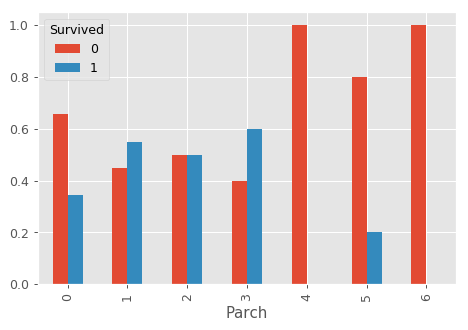

In [42]:
_.plot.bar()

### Treating Parch as quantitative

In [43]:
parch_survived_p = parch_survived.pivot(columns='Survived')

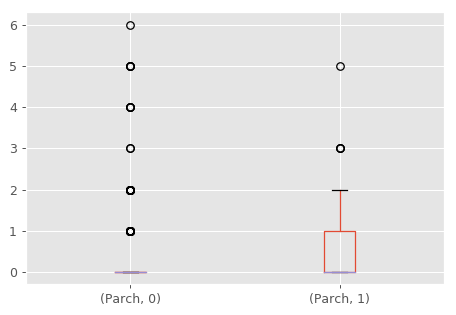

In [44]:
parch_survived_p.plot.box()

In [45]:
parch_survived_p.describe()

Parch            
Survived           0           1
count     549.000000  342.000000
mean        0.329690    0.464912
std         0.823166    0.771712
min         0.000000    0.000000
25%         0.000000    0.000000
50%         0.000000    0.000000
75%         0.000000    1.000000
max         6.000000    5.000000

In [46]:
st.ttest_ind(parch_survived_p.Parch.loc[:, 0],
             parch_survived_p.Parch.loc[:, 1],
             nan_policy='omit')

Ttest_indResult(statistic=-2.4420204414794604, pvalue=0.0147992453747224)

Ho: u1 - u2 = 0  
Ha: u1 - u2 != 0

Where u1 is the mean of Parch of passengers that survived and u2 is the mean of passengers that did not.

___
## Having family onboard have an effect on survival outcome?

### Combining SibSp and Parch as a boolean: Family onboard, or not?

In [47]:
family = ((data.SibSp > 0) | (data.Parch > 0)).rename('family')

In [48]:
pd.crosstab(family, data.Survived, margins=True)

Survived,0,1,All
family,,,
False,374,163,537
True,175,179,354
All,549,342,891


In [49]:
st.contingency.chi2_contingency(_.iloc[:-1, :-1])

(36.00051446773864,
 1.9726543846517183e-09,
 1,
 array([[330.87878788, 206.12121212],
        [218.12121212, 135.87878788]]))

Considering 5% significance test, we can reject the null hyphothesis that having family and survival outcome are independent, and conclude that they are dependent.

In [50]:
pd.crosstab(family, data.Survived, normalize='index')

Survived,0,1
family,,
False,0.696462,0.303538
True,0.494350,0.505650


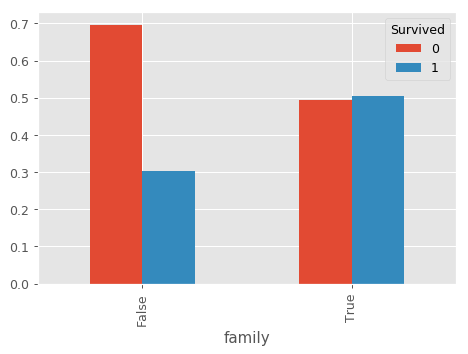

In [51]:
_.plot.bar()

The proportion of family of those who survived is higher than that of those who didn't.

___
## Age vs Survived
### Is there a difference between the means of the ages of survivors and not survivors?

In [52]:
age_survived = data.loc[:, ['Survived', 'Age']].pivot(columns='Survived')

In [53]:
age_survived.describe()

Age            
Survived           0           1
count     424.000000  290.000000
mean       30.626179   28.343690
std        14.172110   14.950952
min         1.000000    0.420000
25%        21.000000   19.000000
50%        28.000000   28.000000
75%        39.000000   36.000000
max        74.000000   80.000000

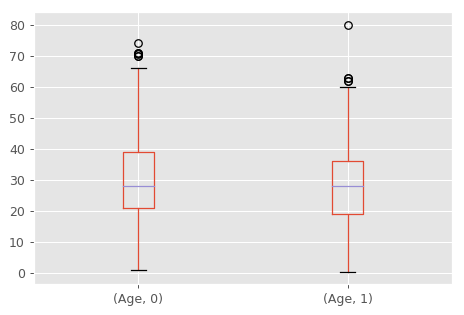

In [54]:
age_survived.plot.box()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c0a79e8>,
      dtype=object)

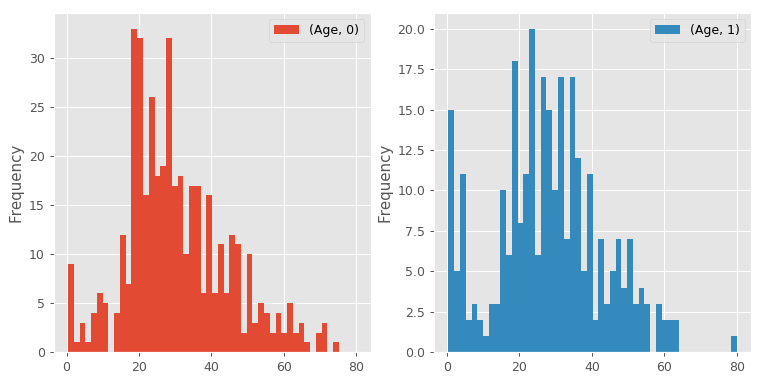

In [55]:
age_survived.plot.hist(bins=50,
                       subplots=True,
                       layout=(1, 2),
                       figsize=(10, 5))

In [56]:
st.ttest_ind(age_survived.Age.loc[:, 0],
             age_survived.Age.loc[:, 1],
             nan_policy='omit')

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348333)

In [57]:
st.f_oneway(age_survived.Age.loc[:, 0].dropna(),
            age_survived.Age.loc[:, 1].dropna())

F_onewayResult(statistic=4.271194933815904, pvalue=0.03912465401348333)

Ho: u1 - u2 = 0  
Ha: u1 - u2 != 0

Where u1 is the mean of passengers that did not survive, and u1 the mean of the ones that did. As the result shows the difference is statistically significant, but is this usefull for practical purposes? We have to ask this question because the difference of ages and distributions between the two classes is very similar, and the _significance_ of the test might be caused by a high sample size.

___
## Cabin
### Transform the cabin to boolean, does having a cabin associated with the survival outcome proportion?

In [58]:
has_cabin = data.Cabin.notna()

In [59]:
pd.crosstab(has_cabin, data.Survived, margins=True)

Survived,0,1,All
Cabin,,,
False,481,206,687
True,68,136,204
All,549,342,891


In [60]:
st.contingency.chi2_contingency(_.iloc[:-1, :-1])

(87.94148561238097,
 6.7419704360811776e-21,
 1,
 array([[423.3030303, 263.6969697],
        [125.6969697,  78.3030303]]))

Ho: has_cabin and survived are indepentend  
Ha: has_cabin and survived are **not** indepentend

The test result is significant < 0.05, therefore we reject Ho and conclude that both variables are not independent.

Let's look at the proportions:

In [61]:
pd.crosstab(has_cabin,
            data.Survived,
            normalize='index')

Survived,0,1
Cabin,,
False,0.700146,0.299854
True,0.333333,0.666667


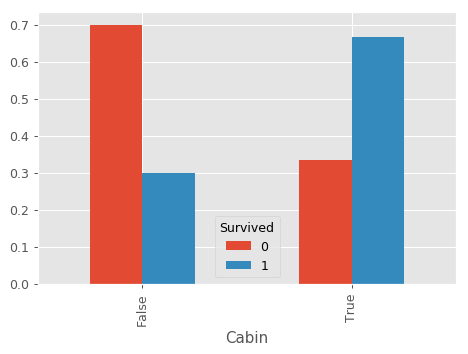

In [62]:
_.plot.bar()

Passengers with cabins have a higher proportion of survivors.

In [63]:
has_cabin

PassengerId
1      False
2       True
3      False
4       True
5      False
6      False
7       True
8      False
9      False
10     False
11      True
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22      True
23     False
24      True
25     False
26     False
27     False
28      True
29     False
30     False
       ...  
862    False
863     True
864    False
865    False
866    False
867    False
868     True
869    False
870    False
871    False
872     True
873     True
874    False
875    False
876    False
877    False
878    False
879    False
880     True
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888     True
889    False
890     True
891    False
Name: Cabin, Length: 891, dtype: bool

In [64]:
data.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F2             3
D              3
E101           3
F33            3
E25            2
B35            2
C125           2
D33            2
E121           2
B49            2
E33            2
B58 B60        2
B22            2
D36            2
B51 B53 B55    2
C124           2
C92            2
E67            2
B28            2
C83            2
B20            2
E8             2
F4             2
F G73          2
B18            2
C93            2
              ..
C111           1
C32            1
B102           1
D9             1
B69            1
B101           1
E34            1
C128           1
D10 D12        1
A24            1
D56            1
B38            1
E49            1
C82            1
A26            1
D49            1
A14            1
B79            1
D47            1
D15            1
C95            1
D46            1
B73            1
B82 B84        1
A31            1
C103           1
A23            1
D50           

___
## Exploring extra information on Name variable

In [65]:
names = pd.Series(''.join(data.loc[data.Survived == 1].Name).split())

In [66]:
names.head()

0     Cumings,
1         Mrs.
2         John
3      Bradley
4    (Florence
dtype: object

In [67]:
names.loc[names.str.strip().str.endswith('.')].value_counts()

Miss.        127
Mrs.          99
Mr.           81
Master.       23
Dr.            3
Mlle.          2
Mme.           1
Ms.            1
L.             1
Major.         1
Sir.           1
Lady.          1
Countess.      1
Col.           1
dtype: int64

In [68]:
data.loc[data.Name.str.contains('Master')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S
60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
